In [92]:
import pandas as pd
import numpy as np
df=pd.read_csv('loan.csv')
df=df.dropna(axis=1,how='all')
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print(numeric_data.shape)
print(categorical_data.shape)
print(df.dtypes.value_counts())


(2260668, 106)
(2260668, 36)
float64    102
object      36
int64        4
dtype: int64


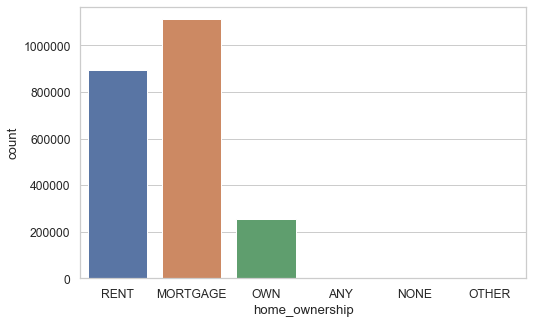

In [10]:
sns.countplot(df['home_ownership']);

In [20]:
listn=df['purpose'].unique().tolist()
print(listn)

['debt_consolidation', 'credit_card', 'house', 'car', 'other', 'vacation', 'home_improvement', 'small_business', 'major_purchase', 'medical', 'renewable_energy', 'moving', 'wedding', 'educational']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

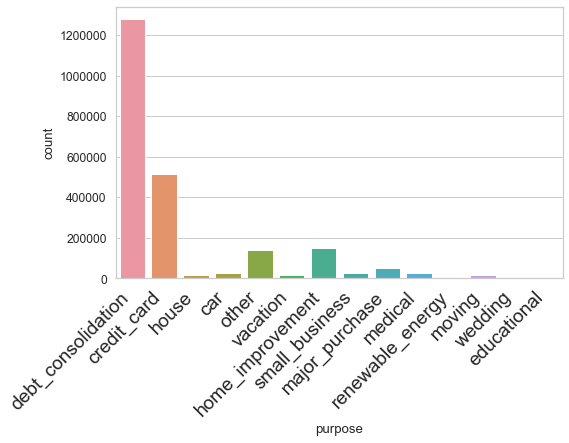

In [21]:
sns.countplot(df.purpose)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Text(0.5, 1.0, 'Total committed by Investors')

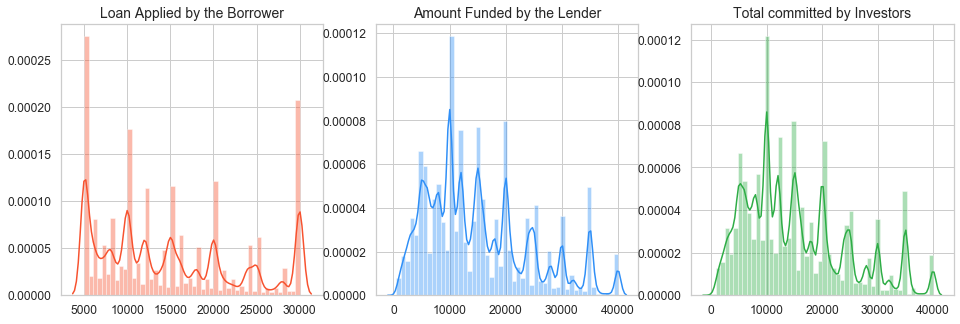

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))




loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [38]:
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

Text(0, 0.5, 'Average loan amount issued')

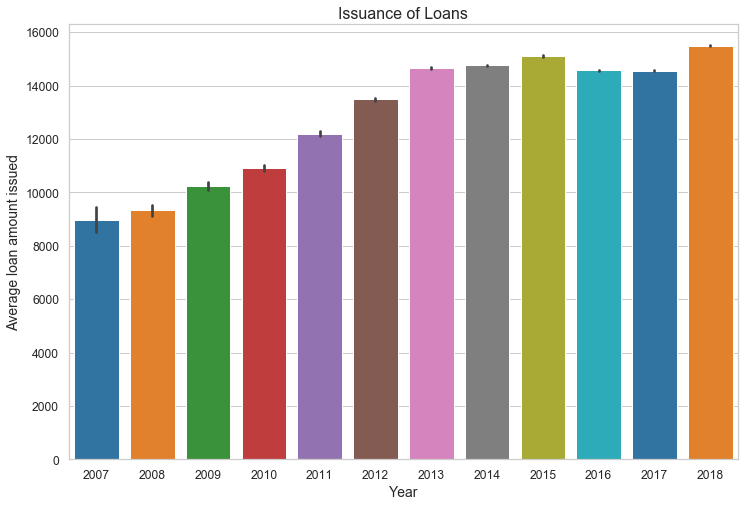

In [39]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

Loan Statuses Counts


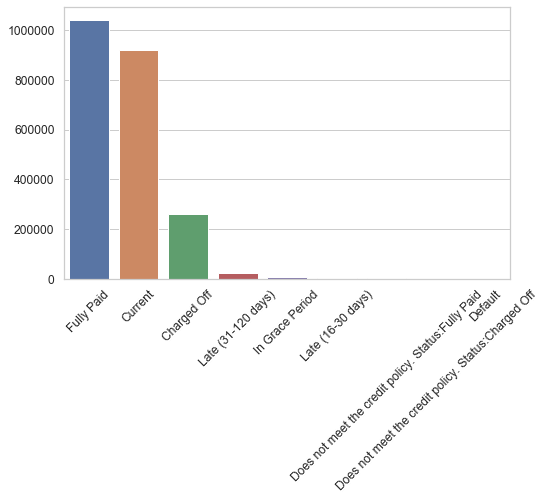

In [41]:
status_counts = df.loan_status.value_counts()
ax = sns.barplot(status_counts.index, status_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Loan Statuses Counts")

In [42]:
status_counts = df.loan_status.value_counts()

In [43]:
status_counts

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

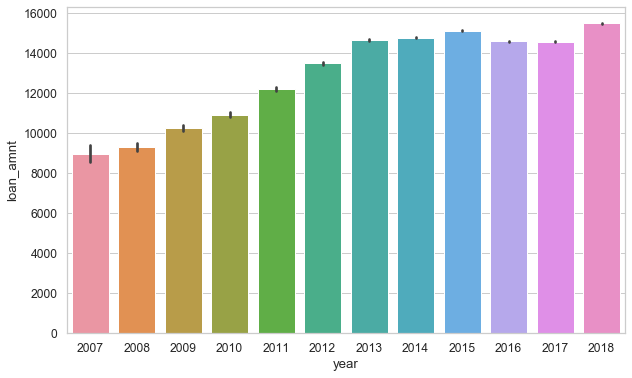

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(df.year, df.loan_amnt)

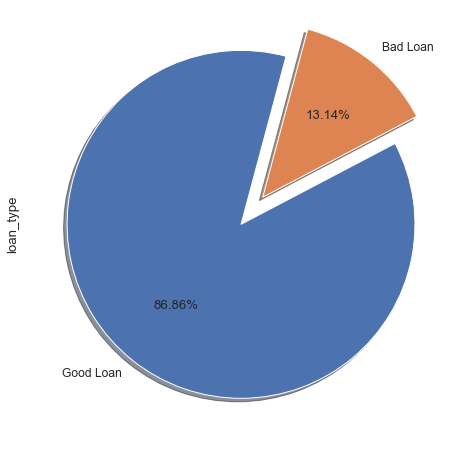

In [46]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
df['loan_type'] = np.nan

def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['loan_type'] = df['loan_status'].apply(loan_type)

plt.figure(figsize=(8,8))
df.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75)

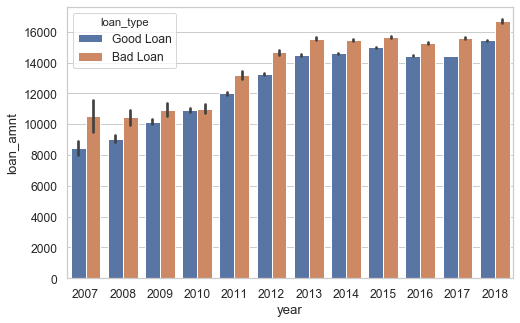

In [47]:
sns.barplot(x=df.year, y=df.loan_amnt, hue=df.loan_type)

In [48]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [49]:
# This code will take the current date and transform it into a year-month format
df['complete_date'] = pd.to_datetime(df['issue_d'])

group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amnt'] = group_dates['loan_amnt']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amnt']])

Text(0.5, 1.0, 'Loans issued by Region')

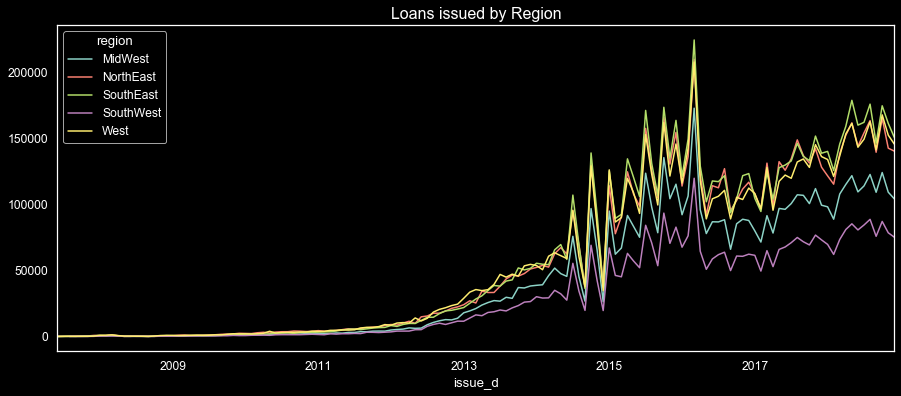

In [50]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amnt = df_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amnt.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

In [51]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

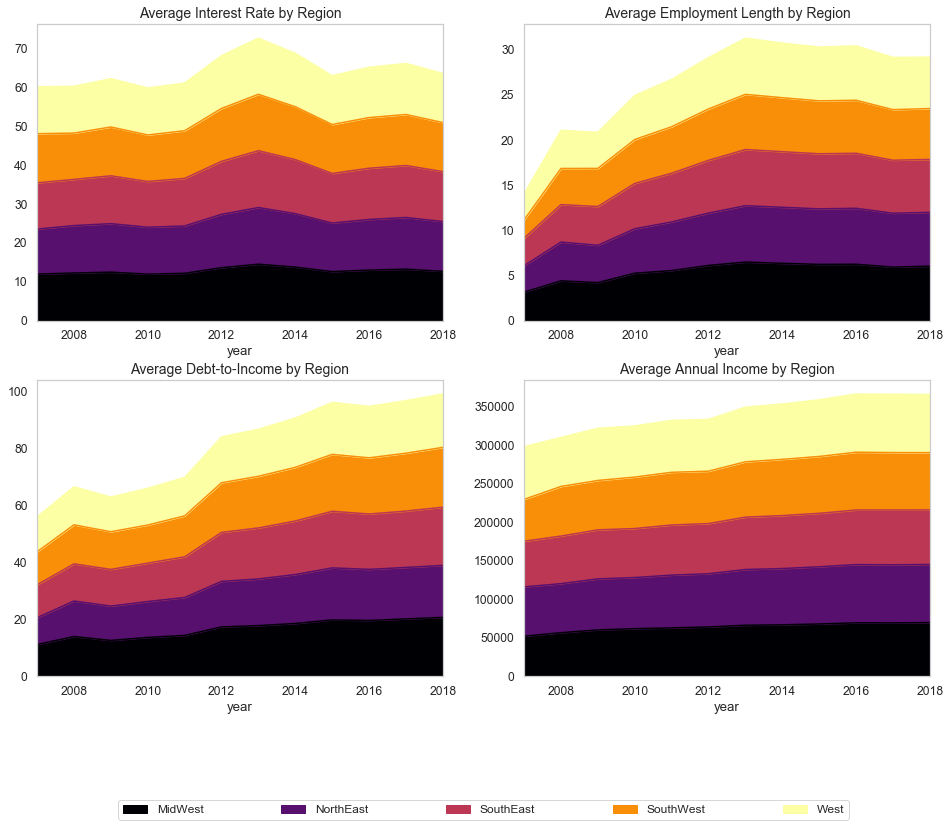

In [52]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = df.groupby(['year', 'region']).int_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

In [53]:
# We have  297033 loans categorized as bad loans
badloans_df = df.loc[df["loan_type"] == "Bad Loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,
MidWest,45202,9,142,1449,550,3609,50961
NorthEast,60827,7,190,2356,957,5356,69693
SouthEast,65460,5,184,2359,974,5596,74578
SouthWest,31833,4,79,1009,463,2794,36182
West,58333,6,166,1779,793,4542,65619


In [54]:
badloans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297033 entries, 1777 to 2260661
Columns: 147 entries, loan_amnt to emp_length_int
dtypes: datetime64[ns](1), float64(104), int64(4), object(38)
memory usage: 335.4+ MB


In [56]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'

In [57]:
# Let's transform the column loan_condition into integrers.

lst = [df]
df['loan_type_int'] = np.nan

for col in lst:
    col.loc[df['loan_type'] == 'Good Loan', 'loan_type_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_type'] == 'Bad Loan', 'loan_type_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
df['loan_type_int'] = df['loan_type_int'].astype(int)

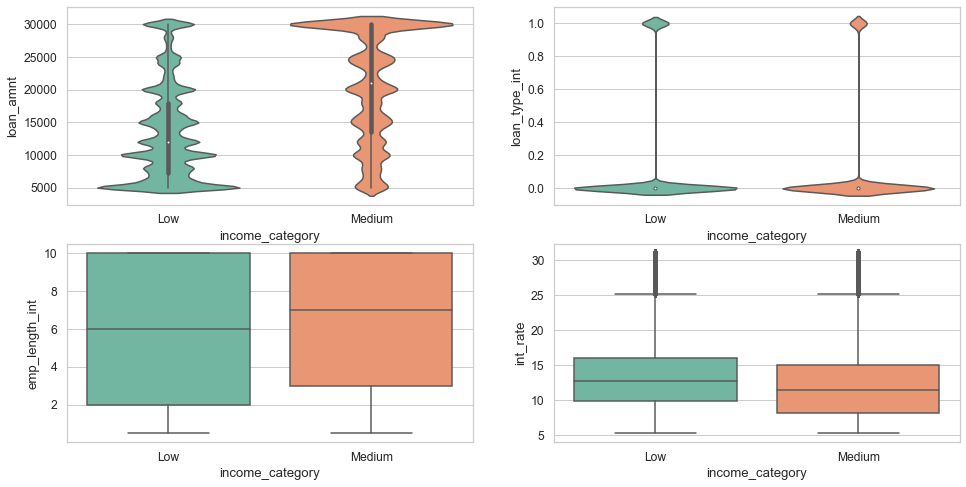

In [58]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(16,8))



sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_type_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax4)

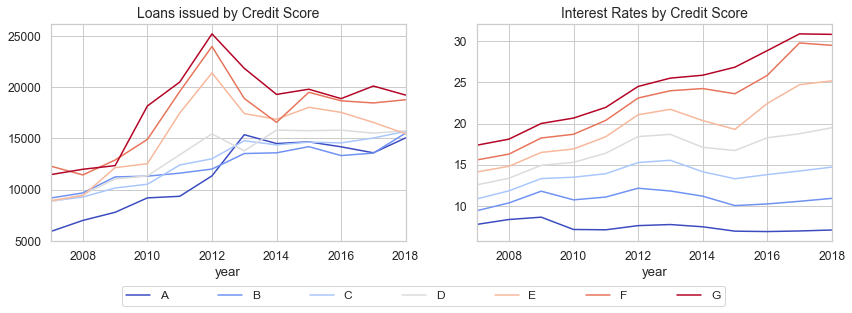

In [59]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

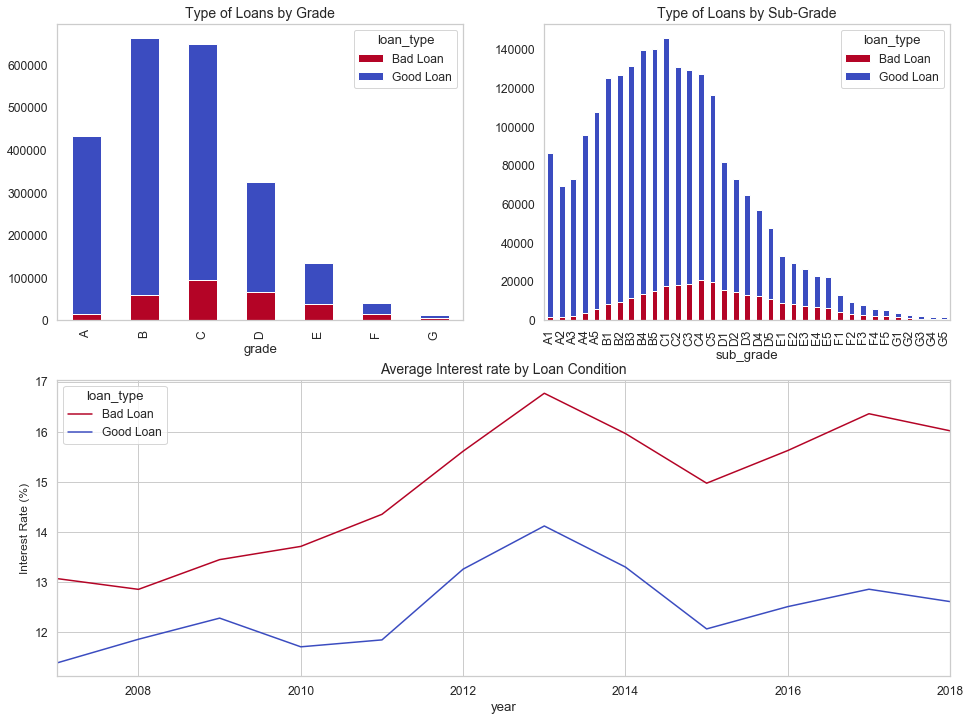

In [60]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade', 'loan_type']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = df.groupby(['sub_grade', 'loan_type']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df.groupby(['year', 'loan_type']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

LOANS ISSUED, GROUPED BY CREDIT SCORE


<Figure size 1440x504 with 0 Axes>

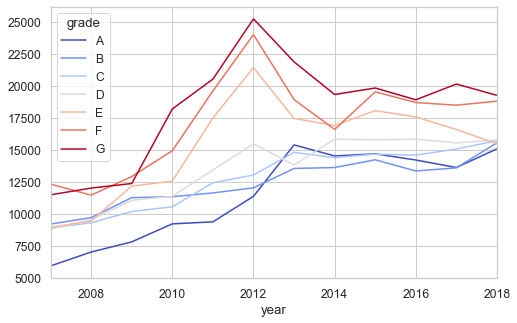

In [61]:
cmap = plt.cm.coolwarm
plt.figure(figsize=(20,7))

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(colormap=cmap)
print("LOANS ISSUED, GROUPED BY CREDIT SCORE")

INTEREST RATES GROUPED BY CREDIT SCORE


<Figure size 1440x720 with 0 Axes>

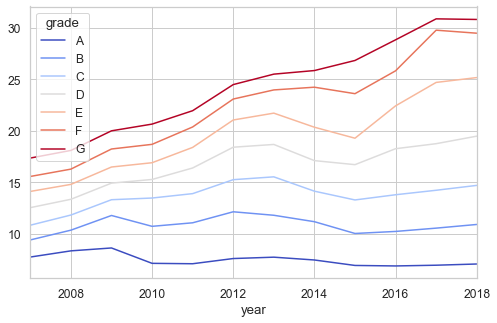

In [62]:
plt.figure(figsize=(20,10))
cmap = plt.cm.coolwarm

by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(colormap=cmap)
print("INTEREST RATES GROUPED BY CREDIT SCORE")

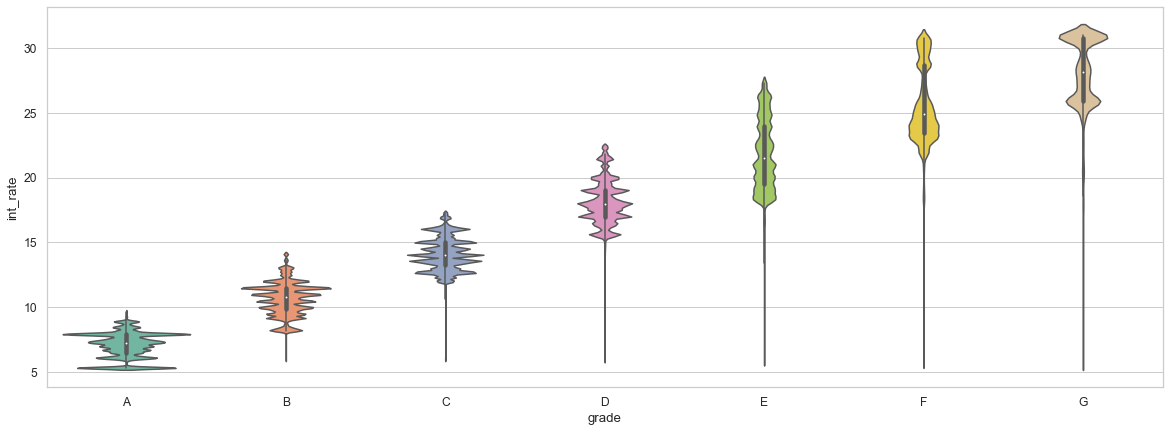

In [63]:
plt.figure(figsize=(20,7))
sns.violinplot(x='grade', y='int_rate', data=df, palette = "Set2", order=['A','B','C','D','E','F','G'])

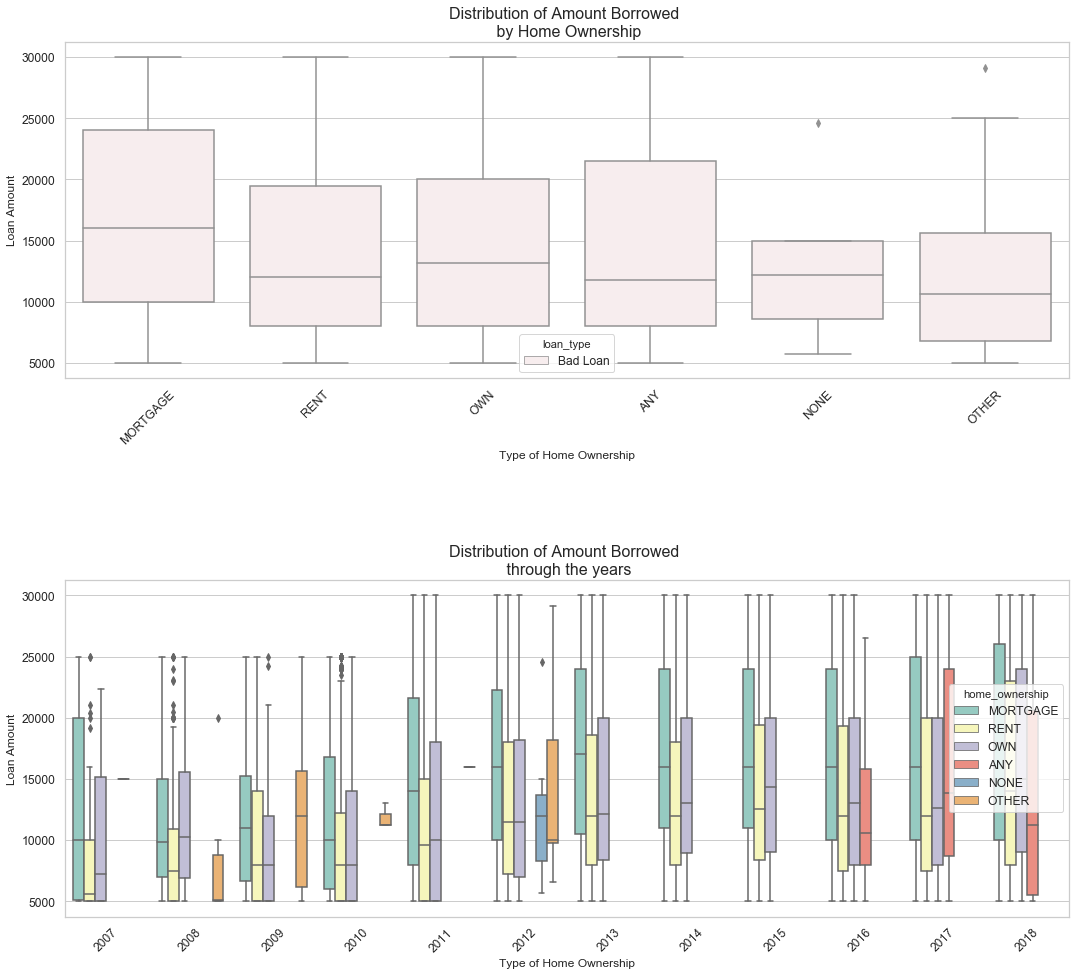

In [64]:
import seaborn as sns

plt.figure(figsize=(18,18))

bad_df = df.loc[df['loan_type'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_type',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amnt', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

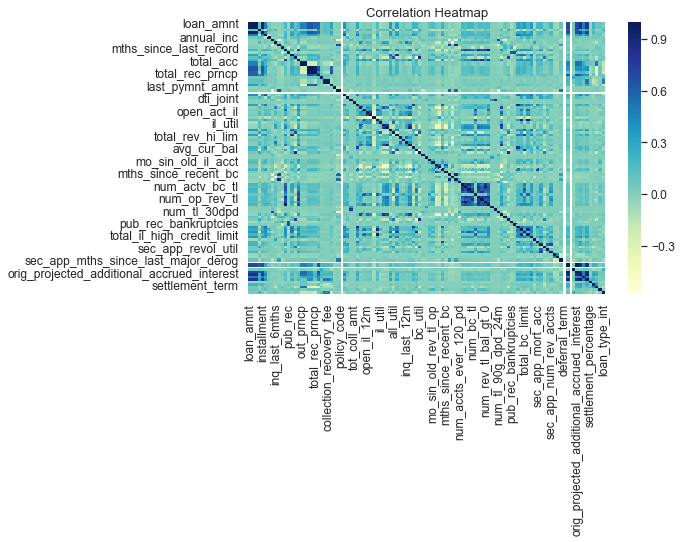

In [65]:
df_correlations = df.corr()

ax = plt.axes()
trace=sns.heatmap(df_correlations,cmap='YlGnBu')
ax.set_title('Correlation Heatmap')

plt.show()


In [ ]:
#Modeling

# i have tried cleanig the data and get it ready for modeling, 
#although i have get rid of Nan valuse after spliting the data into train and test,
# i got the error that input has Nan values

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [80]:
data_with_loanstatus_sliced = df[(df['loan_status']=="Fully Paid") | (df['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})

In [90]:
Dataset_withBoolTarget['loan_status'].value_counts()
print("Current shape of dataset :",Dataset_withBoolTarget.shape)
Dataset_withBoolTarget.head(3)
print(Dataset_withBoolTarget.dtypes.value_counts())

Current shape of dataset : (1303607, 142)
float64    102
object      35
int64        5
dtype: int64


In [88]:
dataset=Dataset_withBoolTarget.dropna(thresh = 340000,axis=1) #340000 is minimum number of non-NA values
print("Current shape of dataset :",dataset.shape)
dataset.head(3)
print(dataset.dtypes.value_counts())

Current shape of dataset : (1303607, 104)
float64    78
object     21
int64       5
dtype: int64


In [89]:
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_accts_ever_120_pd", "delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] #deleting some more columns
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)
print(dataset.value_counts())

Current shape of dataset : (1303607, 82)
float64    67
object     10
int64       5
dtype: int64


In [85]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] #'sub_grade' #selecting final features #'addr_state''tax_liens',
Final_data = dataset[features]
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)
dataset.head(3)

Current shape of dataset : (1303607, 18)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,addr_state,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,...,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
100,30000,30000,30000.0,22.35,1151.16,D,D5,5 years,MORTGAGE,100000.0,0,CA,0.0,51.0,11.0,1.0,15603,37.0,19.0,30026.44250,30026.44,30000.0,26.44,0.0,0.0,30082.32,Jan-2019,0.0,NaN,1,Joint App,0.0,0.0,472330.0,1.0,3.0,2.0,...,42200.0,1.0,1.0,3.0,4.0,42939.0,15181.0,46.9,83.0,73.0,23.0,2.0,1.0,23.0,8.0,NaN,3.0,4.0,3.0,5.0,10.0,6.0,8.0,4.0,11.0,2.0,89.5,33.3,1.0,0.0,527120.0,98453.0,28600.0,101984.0,N,Cash,N
152,40000,40000,40000.0,16.14,975.71,C,C4,< 1 year,MORTGAGE,45000.0,0,OH,0.0,NaN,18.0,0.0,34971,64.5,37.0,40856.67896,40856.68,40000.0,856.68,0.0,0.0,40910.48,Feb-2019,0.0,NaN,1,Joint App,0.0,0.0,271068.0,2.0,8.0,3.0,...,54200.0,4.0,2.0,4.0,5.0,15059.0,14930.0,67.3,114.0,70.0,2.0,2.0,1.0,2.0,9.0,NaN,7.0,9.0,7.0,7.0,26.0,9.0,10.0,9.0,18.0,4.0,100.0,42.9,0.0,0.0,344802.0,161720.0,45700.0,167965.0,N,Cash,N
170,20000,20000,20000.0,7.56,622.68,A,A3,10+ years,MORTGAGE,100000.0,0,WA,0.0,48.0,9.0,0.0,25416,29.9,19.0,20215.79243,20215.79,20000.0,215.79,0.0,0.0,20228.39,Feb-2019,0.0,NaN,1,Joint App,0.0,0.0,515779.0,1.0,2.0,0.0,...,85100.0,2.0,2.0,0.0,5.0,57309.0,59684.0,29.9,171.0,238.0,1.0,1.0,5.0,1.0,13.0,48.0,5.0,5.0,5.0,6.0,5.0,5.0,9.0,5.0,9.0,1.0,94.7,20.0,0.0,0.0,622183.0,71569.0,85100.0,74833.0,N,Cash,N


In [86]:
print(Final_data.dtypes.value_counts())

float64    13
object      3
int64       2
dtype: int64


In [94]:
object_columns_df = Final_data.select_dtypes(include=["object"])
print (object_columns_df.iloc[0])


emp_length         5 years
home_ownership    MORTGAGE
grade                    D
Name: 0, dtype: object


In [95]:
float64_columns_df = Final_data.select_dtypes(include=["float64"])
print (float64_columns_df.iloc[0])

annual_inc               100000.00
last_pymnt_amnt           30082.32
mort_acc                      1.00
pub_rec                       1.00
int_rate                     22.35
open_acc                     11.00
num_actv_rev_tl               4.00
mo_sin_rcnt_rev_tl_op        23.00
mo_sin_old_rev_tl_op         73.00
bc_util                      46.90
bc_open_to_buy            15181.00
avg_cur_bal               42939.00
acc_open_past_24mths          4.00
Name: 0, dtype: float64


In [99]:
columns = [ 'emp_length', 'home_ownership', 'grade']
for col in columns:
    print (Final_data[col].value_counts())
    print (" ")

10+ years    428547
2 years      117820
< 1 year     104550
3 years      104200
1 year        85677
5 years       81623
4 years       78029
6 years       60933
8 years       59125
7 years       58145
9 years       49504
Name: emp_length, dtype: int64
 
MORTGAGE    645496
RENT        517808
OWN         139844
ANY            267
OTHER          144
NONE            48
Name: home_ownership, dtype: int64
 
B    380152
C    369928
A    226243
D    195280
E     91570
F     31483
G      8951
Name: grade, dtype: int64
 


In [100]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
print("Current shape of dataset :",Final_data.shape)
Final_data.head()

Current shape of dataset : (1303607, 18)


,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,30000,5,100000.0,6,4,30082.32,1.0,1.0,22.35,11.0,4.0,23.0,73.0,46.9,15181.0,42939.0,4.0,0
1,40000,1,45000.0,6,5,40910.48,1.0,0.0,16.14,18.0,9.0,2.0,70.0,67.3,14930.0,15059.0,5.0,0
2,20000,10,100000.0,6,7,20228.39,5.0,0.0,7.56,9.0,5.0,1.0,238.0,29.9,59684.0,57309.0,5.0,0
3,4500,10,38500.0,5,6,4553.46,0.0,0.0,11.31,12.0,5.0,2.0,69.0,28.9,10735.0,2428.0,8.0,0
4,8425,3,450000.0,6,3,8754.30,4.0,0.0,27.27,21.0,8.0,12.0,89.0,74.6,11632.0,34516.0,10.0,0


In [101]:
Final_data.fillna(Final_data.mean(),inplace = True)
HTML(Final_data.tail().to_html())
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (1303607, 18)


In [102]:
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = Final_data.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean['loan_status'] = Final_data['loan_status']
data_clean['loan_status'].value_counts()

0    1041952
1     261655
Name: loan_status, dtype: int64

In [103]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)
data_clean.head()

Current shape of dataset : (11000, 18)


,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-0.081436,1.108389,-0.658954,-0.572129,0.579430,-0.704787,-0.851916,-0.357498,-0.858562,-0.291355,-0.201229,0.120628,-0.756574,0.733280,-0.487680,-0.683740,-1.182170,0
1,0.873085,-0.015186,-0.059373,0.907249,-0.962661,-0.687255,-0.343878,-0.357498,1.046683,0.440538,0.421691,-0.572807,1.006973,1.070402,-0.614438,0.155319,0.416865,1
2,-1.311962,1.108389,-0.473369,-0.572129,0.579430,-0.752322,-0.851916,-0.357498,-0.650603,-1.206221,-1.135610,0.057588,0.103427,-1.064699,0.853235,-0.621987,-0.542556,1
3,-0.736949,1.108389,0.426003,0.907249,0.579430,-0.763411,0.164160,1.301257,-0.736727,1.172431,1.044612,0.246707,0.789251,0.309160,-0.221696,0.724279,0.416865,0
4,1.218092,-0.576974,-0.087924,0.907249,-0.191616,-0.646244,-0.343878,-0.357498,0.153928,0.074591,-0.201229,-0.509767,-0.876321,0.425159,-0.065577,0.498020,0.097058,1


In [104]:
data_clean.corr()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
funded_amnt,1.000000,0.090393,0.211110,0.124920,-0.174238,0.344977,0.195115,-0.055086,0.177292,0.183937,0.139621,0.026882,0.151353,0.047641,0.185626,0.204104,0.020283,0.081058
emp_length,0.090393,1.000000,0.054070,0.127935,-0.006147,0.030503,0.182477,0.043796,0.003720,0.046293,0.129965,0.009485,0.186819,0.032018,0.010207,0.091324,0.031151,-0.004463
annual_inc,0.211110,0.054070,1.000000,0.088552,0.046425,0.099614,0.138608,0.010071,-0.049091,0.080363,0.036779,0.013824,0.081441,0.000631,0.091757,0.188737,0.036738,-0.028606
home_ownership,0.124920,0.127935,0.088552,1.000000,0.038049,0.095385,0.372489,-0.002218,-0.036665,0.086247,0.041115,0.008229,0.081797,0.035538,0.008673,0.339992,0.040439,-0.047532
grade,-0.174238,-0.006147,0.046425,0.038049,1.000000,0.053143,0.099804,-0.046739,-0.952560,-0.022508,-0.091520,0.114246,0.129209,-0.211301,0.244020,0.090256,-0.198695,-0.330623
last_pymnt_amnt,0.344977,0.030503,0.099614,0.095385,0.053143,1.000000,0.168939,-0.035901,-0.047952,0.059708,-0.015498,0.035248,0.083724,-0.049974,0.142621,0.168865,-0.008307,-0.507006
mort_acc,0.195115,0.182477,0.138608,0.372489,0.099804,0.168939,1.000000,0.001711,-0.101957,0.108588,0.050686,0.027958,0.285183,0.002498,0.110529,0.465634,0.036348,-0.103143
pub_rec,-0.055086,0.043796,0.010071,-0.002218,-0.046739,-0.035901,0.001711,1.000000,0.040313,-0.003631,0.006510,-0.051663,0.061886,-0.041445,-0.060570,-0.041843,0.106733,0.039415
int_rate,0.177292,0.003720,-0.049091,-0.036665,-0.952560,-0.047952,-0.101957,0.040313,1.000000,0.014192,0.082088,-0.112174,-0.130643,0.206928,-0.242512,-0.082191,0.188975,0.324671
open_acc,0.183937,0.046293,0.080363,0.086247,-0.022508,0.059708,0.108588,-0.003631,0.014192,1.000000,0.658660,-0.229820,0.117527,-0.086594,0.274965,-0.116652,0.481619,0.022125


In [111]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 18 columns):
funded_amnt              11000 non-null float64
emp_length               10324 non-null float64
annual_inc               11000 non-null float64
home_ownership           11000 non-null float64
grade                    11000 non-null float64
last_pymnt_amnt          11000 non-null float64
mort_acc                 11000 non-null float64
pub_rec                  11000 non-null float64
int_rate                 11000 non-null float64
open_acc                 11000 non-null float64
num_actv_rev_tl          11000 non-null float64
mo_sin_rcnt_rev_tl_op    11000 non-null float64
mo_sin_old_rev_tl_op     11000 non-null float64
bc_util                  11000 non-null float64
bc_open_to_buy           11000 non-null float64
avg_cur_bal              11000 non-null float64
acc_open_past_24mths     11000 non-null float64
loan_status              11000 non-null int64
dtypes: float64(17), int64(1)

**Learning Curve**

In [121]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.75, 0.90), cv=cv, n_jobs=4)
plt.show()

In [124]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")


In [125]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [126]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(data_clean, test_size = 0.2, random_state=42) #just for bootstrapping

In [127]:
X_train.head()


,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
10735,-1.426964,1.108389,-0.516197,0.907249,-0.191616,-0.756159,0.672197,-0.357498,0.431207,-0.291355,-0.512689,-0.446728,0.723934,1.186400,-0.662701,0.050862,-0.222749
5937,0.298072,-0.296080,11.047158,-0.572129,0.579430,-0.691093,-0.851916,-0.357498,-1.066522,0.440538,-0.201229,0.120628,-0.625941,-0.035211,0.092351,-0.519044,0.416865
7642,-0.552946,-1.138762,-0.630403,-0.572129,-0.191616,-0.720803,-0.851916,-0.357498,-0.119151,0.440538,-0.824150,-0.509767,-1.039613,0.298286,-0.459862,-0.695220,0.416865
3328,0.551078,-0.576974,-0.367729,0.907249,-0.191616,1.313360,-0.343878,-0.357498,-0.182169,-0.474328,-0.201229,-0.257609,-1.268220,0.247536,-0.470184,0.550374,-0.542556
8681,1.218092,1.108389,-0.016545,0.907249,-0.191616,-0.591259,0.672197,-0.357498,0.580350,-0.840275,0.110231,-0.761925,1.181150,-0.111335,-0.393432,-0.796334,-0.222749


In [128]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
# ['funded_amnt','emp_length','annual_inc','home_ownership','grade',"last_pymnt_amnt", "mort_acc", "pub_rec", 
# "int_rate", "open_acc","num_actv_rev_tl","mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
#"avg_cur_bal","acc_open_past_24mths",'loan_status']


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').